In [1]:
import numpy as np
import matplotlib.pyplot as plt

import keras
from keras import layers
from IPython.display import clear_output


In [2]:
class PlotLosses(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.i = 0
        self.x = []
        self.losses = []
        self.val_losses = []
        
        self.fig = plt.figure()
        
        self.logs = []

    def on_epoch_end(self, epoch, logs={}):
        
        self.logs.append(logs)
        self.x.append(self.i)
        self.losses.append(logs.get('loss'))
        self.val_losses.append(logs.get('val_loss'))
        self.i += 1
        
        clear_output(wait=True)
        plt.plot(self.x, self.losses, label="loss")
        plt.plot(self.x, self.val_losses, label="val_loss")
        plt.legend()
        plt.show();
        
plot_losses = PlotLosses()

In [3]:
data = np.genfromtxt('data/train.csv', delimiter=',')


In [4]:

X_train = np.pad(data[1:30001,402:802].reshape((-1,20,20)),6)[6:30006]
Y_train = data[1:30001,2:402]#.reshape((-1,20,20))

X_test = np.pad(data[-1001:-1,402:802].reshape((-1,20,20)),6)[6:1006]
Y_test = data[-1001:-1,2:402] #.reshape((-1,20,20))

In [5]:
model = keras.applications.ResNet50V2(
    include_top=True,
    weights=None,
    input_tensor=None,
    input_shape=(32,32,1),
    pooling=None,
    classes=400,
    classifier_activation="sigmoid",
)


In [6]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy')

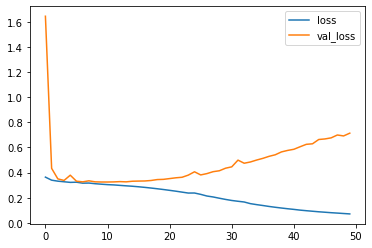

In [7]:
model.fit(X_train, Y_train,
          epochs = 50,
          batch_size = 128,
          use_multiprocessing=True,
          validation_data=(X_test, Y_test),
          callbacks = [plot_losses],verbose = 0)